"B","3","1065642","2016-07-19 00:14:24","105#2016-07-19 00:14:24#9.56;100#2016-07-19 00:14:34#6.75;111#2016-07-19 00:14:41#13.00;103#2016-07-19 00:14:54#7.47;122#2016-07-19 00:15:02#32.85","70.85"

{'B-3': {datetime.datetime(2016, 7, 19, 0, 14): [70.85]}}


100% |########################################################################|


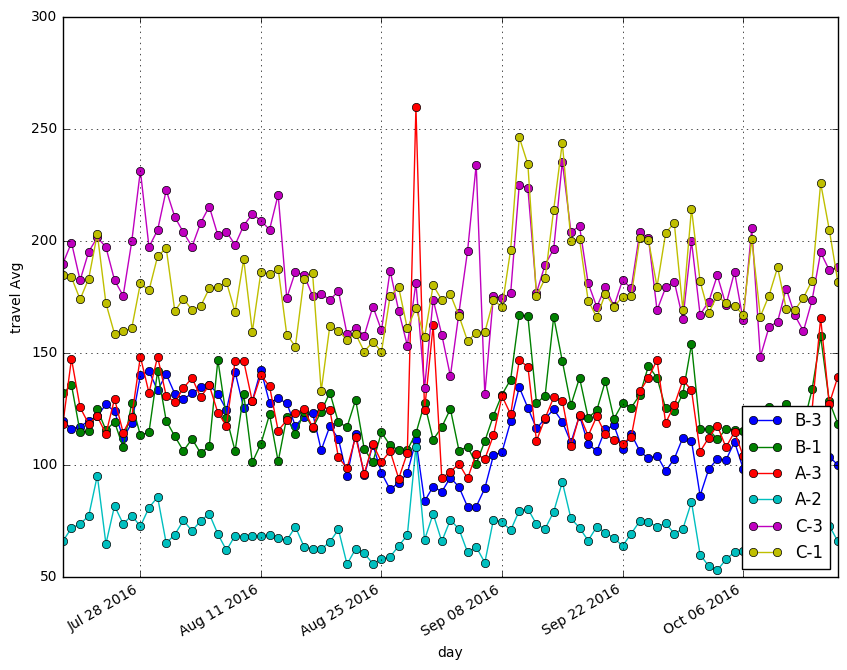

In [38]:
# -*- coding: utf-8 -*-
#!/usr/bin/env python

"""
Objective:
Calculate the average travel time for each 20-minute time window.

"""

# import necessary modules
import math
from datetime import datetime,timedelta
import time
import progressbar
import matplotlib.pyplot as plt

bar = progressbar.ProgressBar()

file_suffix = '.csv'
path = '../dataSets/training/'  # set the data directory

def avgTravelTime(in_file):

    out_suffix = '_20min_avg_travel_time'
    in_file_name = in_file + file_suffix
    out_file_name = in_file.split('_')[1] + out_suffix + file_suffix

    # Step 1: Load trajectories
    fr = open(path + in_file_name, 'r')
    fr.readline()  # skip the header
    traj_data = fr.readlines()
    fr.close()
    print(traj_data[0])

    # Step 2: Create a dictionary to store travel time for each route per time window
    travel_times = {}  # key: route_id. Value is also a dictionary of which key is the start time for the time window and value is a list of travel times
    for i in bar(range(len(traj_data))):
        each_traj = traj_data[i].replace('"', '').split(',')
        intersection_id = each_traj[0]
        tollgate_id = each_traj[1]

        route_id = intersection_id + '-' + tollgate_id
        if route_id not in travel_times.keys():
            travel_times[route_id] = {}

        trace_start_time = each_traj[3]
        trace_start_time = datetime.strptime(trace_start_time, "%Y-%m-%d %H:%M:%S")
        #time_window_minute = math.floor(trace_start_time.minute / 20) * 20
        time_window_minute = trace_start_time.minute
        start_time_window = datetime(trace_start_time.year, trace_start_time.month, trace_start_time.day,trace_start_time.hour, time_window_minute, 0)
        tt = float(each_traj[-1]) # travel time

        if start_time_window not in travel_times[route_id].keys():
            travel_times[route_id][start_time_window] = [tt]
        else:
            travel_times[route_id][start_time_window].append(tt)

        if i == 0:
            print travel_times
        
    # Step 3: Calculate average travel time for each route per time window
    fw = open(out_file_name, 'w')
    
    fw.writelines(','.join(['"intersection_id"', '"tollgate_id"', '"time_window"', '"avg_travel_time"']) + '\n')
    plt.figure(figsize=(10, 8))
    plt.ylabel('travel Avg')
    plt.xlabel('day')
    plt.grid()
    
    for route in travel_times.keys():
        route_time_windows = list(travel_times[route].keys())
        route_time_windows.sort()
        datas = {} # Y-M-D
        for time_window_start in route_time_windows:
            time_window_end = time_window_start + timedelta(minutes=20)
            tt_set = travel_times[route][time_window_start]
            avg_tt = round(sum(tt_set) / float(len(tt_set)), 2)
            out_line = ','.join(['"' + route.split('-')[0] + '"', '"' + route.split('-')[1] + '"',
                                 '"[' + str(time_window_start) + ',' + str(time_window_end) + ')"',
                                 '"' + str(avg_tt) + '"']) + '\n'
            fw.writelines(out_line)
            
            one_day = '-'.join([str(time_window_start.year), str(time_window_start.month), str(time_window_start.day)])
            one_day = datetime.strptime(one_day, "%Y-%m-%d")
            if one_day not in datas.keys():
                datas[one_day] = list()
            datas[one_day] += tt_set

        # plot
        sort_data = {}
        for i in datas.keys():
            l = datas[i]
            avg = sum(float(j) for j in l)/len(l)
            sort_data[i] = avg
        
        x = []
        y = []
        for key in sorted(sort_data):
            x.append(key)
            y.append(sort_data[key])
        
        plt.plot(x, y, 'o-', label = route)
        # beautify the x-labels
        plt.legend(loc=4)
        plt.gcf().autofmt_xdate()
    
    plt.show()
    fw.close()

def main():
    """x = ['2016-7-19', '2016-7-27', '2016-7-26', '2016-7-25', '2016-7-24', '2016-7-23', '2016-7-22', '2016-7-21', '2016-7-20', '2016-7-29', '2016-7-28', '2016-9-29', '2016-9-28', '2016-9-21', '2016-9-20', '2016-9-23', '2016-9-22', '2016-9-25', '2016-9-24', '2016-9-27', '2016-9-26', '2016-8-7', '2016-8-6', '2016-8-5', '2016-8-4', '2016-8-3', '2016-8-2', '2016-8-1', '2016-7-30', '2016-7-31', '2016-8-9', '2016-8-8', '2016-9-30', '2016-10-15', '2016-10-14', '2016-10-17', '2016-10-16', '2016-8-31', '2016-8-30', '2016-10-13', '2016-10-12', '2016-9-10', '2016-9-11', '2016-9-12', '2016-9-13', '2016-9-14', '2016-9-15', '2016-9-16', '2016-9-17', '2016-9-18', '2016-9-19', '2016-10-11', '2016-10-10', '2016-8-28', '2016-8-29', '2016-8-26', '2016-8-27', '2016-8-24', '2016-8-25', '2016-8-22', '2016-8-23', '2016-8-20', '2016-8-21', '2016-9-8', '2016-9-9', '2016-9-2', '2016-9-3', '2016-9-1', '2016-9-6', '2016-9-7', '2016-9-4', '2016-9-5', '2016-8-13', '2016-8-12', '2016-8-11', '2016-8-10', '2016-8-17', '2016-8-16', '2016-8-15', '2016-8-14', '2016-8-19', '2016-8-18', '2016-10-5', '2016-10-4', '2016-10-7', '2016-10-6', '2016-10-1', '2016-10-3', '2016-10-2', '2016-10-9', '2016-10-8']
    y = [119.68005208333328, 118.71673076923072, 111.92554502369667, 123.90796296296288, 127.09045801526716, 121.71252173913042, 119.64579234972672, 117.09007751937982, 116.17695876288657, 141.87734513274333, 140.01423423423418, 112.23645454545468, 102.71183574879224, 117.62018348623845, 115.89005847953223, 113.84972656250002, 106.98805, 102.88286219081273, 106.15999999999998, 97.2786899563319, 104.20169154228847, 124.56388059701486, 131.78595890410958, 135.69047619047615, 134.66960264900672, 131.90214285714282, 129.45476510067124, 131.73950920245395, 133.2972807017544, 140.54500000000004, 125.43331325301205, 141.53277372262778, 110.78979999999993, 105.81449438202249, 96.98619433198381, 99.95041450777197, 103.74073770491806, 90.36711538461539, 83.75925373134328, 99.36726907630518, 104.45693693693691, 134.67611494252878, 125.45872576177287, 116.28464454976293, 120.6983333333334, 124.80105263157901, 119.31913705583752, 110.0341203703704, 122.01260586319212, 109.30592760180994, 106.20059701492538, 109.73052023121383, 110.63067708333331, 96.25711864406779, 110.98728395061728, 89.05245098039218, 92.04881188118814, 108.97091666666665, 96.44681818181816, 113.92030612244896, 95.34101851851848, 111.72089430894309, 94.97015503875976, 105.78244019138755, 119.42164122137402, 94.37642857142863, 90.13920634920635, 88.02152542372883, 89.5592, 104.29125874125874, 81.27185185185184, 81.40107142857143, 129.69654135338348, 127.73449999999994, 142.44932885906042, 128.5889240506329, 123.17235294117643, 121.5675572519084, 117.47759398496248, 127.45976377952753, 117.24753521126759, 106.63082191780819, 110.25774647887322, 102.159647696477, 105.45915492957742, 98.39275204359663, 86.29287841191059, 102.66476821192053, 98.08651515151516, 103.9825133689839, 99.89650537634407]
    datas = {}
    for i in range(len(x)):
        datas[datetime.strptime(x[i], "%Y-%m-%d")] = y[i]
    
    x = []
    y = []
    route_time_windows = list(datas.keys())
    route_time_windows.sort()
    for key in route_time_windows:
        print key
        x.append(key)
        y.append(datas[key])

    
    plt.plot(x,y,'o-')
    
    plt.gcf().autofmt_xdate()
    plt.show()"""
    in_file = 'trajectories(table 5)_training'
    avgTravelTime(in_file)

if __name__ == '__main__':
    main()





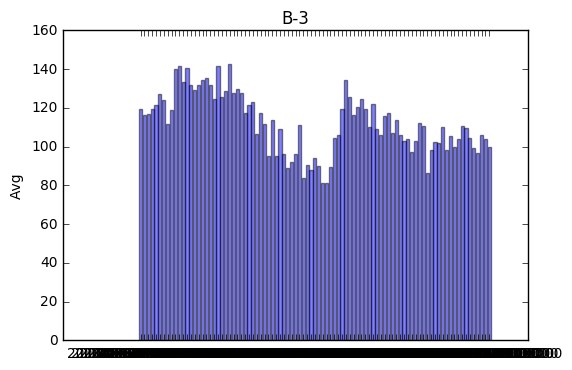

In [6]:
import numpy as np

x = ['2016-7-19', '2016-7-27', '2016-7-26', '2016-7-25', '2016-7-24', '2016-7-23', '2016-7-22', '2016-7-21', '2016-7-20', '2016-7-29', '2016-7-28', '2016-9-29', '2016-9-28', '2016-9-21', '2016-9-20', '2016-9-23', '2016-9-22', '2016-9-25', '2016-9-24', '2016-9-27', '2016-9-26', '2016-8-7', '2016-8-6', '2016-8-5', '2016-8-4', '2016-8-3', '2016-8-2', '2016-8-1', '2016-7-30', '2016-7-31', '2016-8-9', '2016-8-8', '2016-9-30', '2016-10-15', '2016-10-14', '2016-10-17', '2016-10-16', '2016-8-31', '2016-8-30', '2016-10-13', '2016-10-12', '2016-9-10', '2016-9-11', '2016-9-12', '2016-9-13', '2016-9-14', '2016-9-15', '2016-9-16', '2016-9-17', '2016-9-18', '2016-9-19', '2016-10-11', '2016-10-10', '2016-8-28', '2016-8-29', '2016-8-26', '2016-8-27', '2016-8-24', '2016-8-25', '2016-8-22', '2016-8-23', '2016-8-20', '2016-8-21', '2016-9-8', '2016-9-9', '2016-9-2', '2016-9-3', '2016-9-1', '2016-9-6', '2016-9-7', '2016-9-4', '2016-9-5', '2016-8-13', '2016-8-12', '2016-8-11', '2016-8-10', '2016-8-17', '2016-8-16', '2016-8-15', '2016-8-14', '2016-8-19', '2016-8-18', '2016-10-5', '2016-10-4', '2016-10-7', '2016-10-6', '2016-10-1', '2016-10-3', '2016-10-2', '2016-10-9', '2016-10-8']
y = [119.68005208333328, 118.71673076923072, 111.92554502369667, 123.90796296296288, 127.09045801526716, 121.71252173913042, 119.64579234972672, 117.09007751937982, 116.17695876288657, 141.87734513274333, 140.01423423423418, 112.23645454545468, 102.71183574879224, 117.62018348623845, 115.89005847953223, 113.84972656250002, 106.98805, 102.88286219081273, 106.15999999999998, 97.2786899563319, 104.20169154228847, 124.56388059701486, 131.78595890410958, 135.69047619047615, 134.66960264900672, 131.90214285714282, 129.45476510067124, 131.73950920245395, 133.2972807017544, 140.54500000000004, 125.43331325301205, 141.53277372262778, 110.78979999999993, 105.81449438202249, 96.98619433198381, 99.95041450777197, 103.74073770491806, 90.36711538461539, 83.75925373134328, 99.36726907630518, 104.45693693693691, 134.67611494252878, 125.45872576177287, 116.28464454976293, 120.6983333333334, 124.80105263157901, 119.31913705583752, 110.0341203703704, 122.01260586319212, 109.30592760180994, 106.20059701492538, 109.73052023121383, 110.63067708333331, 96.25711864406779, 110.98728395061728, 89.05245098039218, 92.04881188118814, 108.97091666666665, 96.44681818181816, 113.92030612244896, 95.34101851851848, 111.72089430894309, 94.97015503875976, 105.78244019138755, 119.42164122137402, 94.37642857142863, 90.13920634920635, 88.02152542372883, 89.5592, 104.29125874125874, 81.27185185185184, 81.40107142857143, 129.69654135338348, 127.73449999999994, 142.44932885906042, 128.5889240506329, 123.17235294117643, 121.5675572519084, 117.47759398496248, 127.45976377952753, 117.24753521126759, 106.63082191780819, 110.25774647887322, 102.159647696477, 105.45915492957742, 98.39275204359663, 86.29287841191059, 102.66476821192053, 98.08651515151516, 103.9825133689839, 99.89650537634407]
datas = {}
for i in range(len(x)):
    datas[datetime.strptime(x[i], "%Y-%m-%d")] = y[i]
    
x = []
y = []
route_time_windows = list(datas.keys())
route_time_windows.sort()
for key in route_time_windows:
    x.append(key)
    y.append(datas[key])

plt.bar(np.arange(len(y)), y, align='center', alpha=0.5)
plt.xticks(np.arange(len(y)), x)
plt.ylabel('Avg')
plt.title('B-3')
 
plt.show()

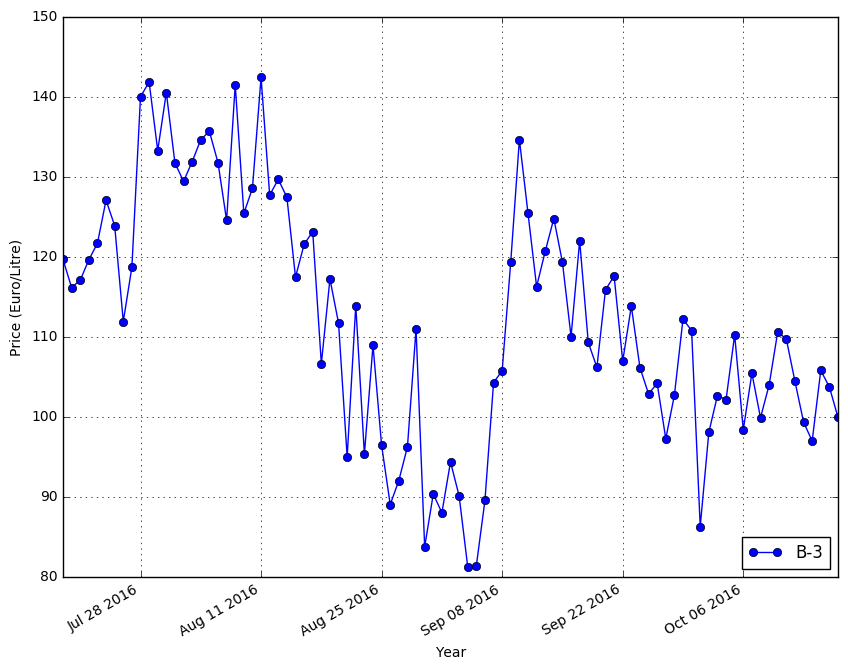

In [34]:
x = ['2016-7-19', '2016-7-27', '2016-7-26', '2016-7-25', '2016-7-24', '2016-7-23', '2016-7-22', '2016-7-21', '2016-7-20', '2016-7-29', '2016-7-28', '2016-9-29', '2016-9-28', '2016-9-21', '2016-9-20', '2016-9-23', '2016-9-22', '2016-9-25', '2016-9-24', '2016-9-27', '2016-9-26', '2016-8-7', '2016-8-6', '2016-8-5', '2016-8-4', '2016-8-3', '2016-8-2', '2016-8-1', '2016-7-30', '2016-7-31', '2016-8-9', '2016-8-8', '2016-9-30', '2016-10-15', '2016-10-14', '2016-10-17', '2016-10-16', '2016-8-31', '2016-8-30', '2016-10-13', '2016-10-12', '2016-9-10', '2016-9-11', '2016-9-12', '2016-9-13', '2016-9-14', '2016-9-15', '2016-9-16', '2016-9-17', '2016-9-18', '2016-9-19', '2016-10-11', '2016-10-10', '2016-8-28', '2016-8-29', '2016-8-26', '2016-8-27', '2016-8-24', '2016-8-25', '2016-8-22', '2016-8-23', '2016-8-20', '2016-8-21', '2016-9-8', '2016-9-9', '2016-9-2', '2016-9-3', '2016-9-1', '2016-9-6', '2016-9-7', '2016-9-4', '2016-9-5', '2016-8-13', '2016-8-12', '2016-8-11', '2016-8-10', '2016-8-17', '2016-8-16', '2016-8-15', '2016-8-14', '2016-8-19', '2016-8-18', '2016-10-5', '2016-10-4', '2016-10-7', '2016-10-6', '2016-10-1', '2016-10-3', '2016-10-2', '2016-10-9', '2016-10-8']
y = [119.68005208333328, 118.71673076923072, 111.92554502369667, 123.90796296296288, 127.09045801526716, 121.71252173913042, 119.64579234972672, 117.09007751937982, 116.17695876288657, 141.87734513274333, 140.01423423423418, 112.23645454545468, 102.71183574879224, 117.62018348623845, 115.89005847953223, 113.84972656250002, 106.98805, 102.88286219081273, 106.15999999999998, 97.2786899563319, 104.20169154228847, 124.56388059701486, 131.78595890410958, 135.69047619047615, 134.66960264900672, 131.90214285714282, 129.45476510067124, 131.73950920245395, 133.2972807017544, 140.54500000000004, 125.43331325301205, 141.53277372262778, 110.78979999999993, 105.81449438202249, 96.98619433198381, 99.95041450777197, 103.74073770491806, 90.36711538461539, 83.75925373134328, 99.36726907630518, 104.45693693693691, 134.67611494252878, 125.45872576177287, 116.28464454976293, 120.6983333333334, 124.80105263157901, 119.31913705583752, 110.0341203703704, 122.01260586319212, 109.30592760180994, 106.20059701492538, 109.73052023121383, 110.63067708333331, 96.25711864406779, 110.98728395061728, 89.05245098039218, 92.04881188118814, 108.97091666666665, 96.44681818181816, 113.92030612244896, 95.34101851851848, 111.72089430894309, 94.97015503875976, 105.78244019138755, 119.42164122137402, 94.37642857142863, 90.13920634920635, 88.02152542372883, 89.5592, 104.29125874125874, 81.27185185185184, 81.40107142857143, 129.69654135338348, 127.73449999999994, 142.44932885906042, 128.5889240506329, 123.17235294117643, 121.5675572519084, 117.47759398496248, 127.45976377952753, 117.24753521126759, 106.63082191780819, 110.25774647887322, 102.159647696477, 105.45915492957742, 98.39275204359663, 86.29287841191059, 102.66476821192053, 98.08651515151516, 103.9825133689839, 99.89650537634407]
datas = {}
for i in range(len(x)):
    datas[datetime.strptime(x[i], "%Y-%m-%d")] = y[i]
    
x = []
y = []
route_time_windows = list(datas.keys())
route_time_windows.sort()
for key in route_time_windows:
    x.append(key)
    y.append(datas[key])

plt.figure(figsize=(10, 8))
plt.plot(x,y,'o-',label = 'B-3')
plt.legend(loc=4)
plt.ylabel('Price (Euro/Litre)')
plt.xlabel('Year')
plt.grid()
plt.gcf().autofmt_xdate()
plt.show()